In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./data/spam.csv',encoding='latin-1')

In [3]:
train_df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
train_df = train_df[['v1','v2']]
train_df.columns = ['label','message']
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
train_df.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [7]:
"""
ÊñáÊú¨È¢ÑÂ§ÑÁêÜ
‰∏çÂêå‰∫é‰πãÂâçÁöÑtitanicÈ°πÁõÆÈÇ£ÁßçÁªìÊûÑÂåñÊï∞ÊçÆ
ÊñáÊú¨ÁöÑÈúÄË¶ÅËøõË°åÈ¢ÑÂ§ÑÁêÜÔºåÊØîÂ¶ÇÔºö
1.ÂàÜËØçÔºà‰ªéÂè•Â≠ê‰∏≠ÊãÜÂàÜÂá∫ÂçïËØçÔºâ
2.ÂÅúÁî®ËØçÂ§ÑÁêÜÔºàÂéªÈô§the, a ,isÁ≠âÂ∏∏ËßÅ‰ΩÜÊó†ÂÆûÈôÖÊÑè‰πâÁöÑËØçÔºâ
3.ËØçÂπ≤ÊèêÂèñÔºàÊØîÂ¶ÇÂ∞ÜrunnigËΩ¨Êç¢Âà∞ÂéüÂßãÂΩ¢ÂºèrunÔºâ
4.ËØçÊÄßÊ†áÊ≥®Á≠â

ÊñáÊú¨Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÈúÄË¶Å‰∏§‰∏™Â∫ì„ÄÇ
‰∏Ä‰∏™ÊòØnltkËøôÊòØ‰∏Ä‰∏™Ëá™ÁÑ∂ËØ≠Ë®ÄÂ§ÑÁêÜÂ∑•ÂÖ∑ÂåÖÔºåÂåÖÂê´Êàë‰∏äÈù¢ËØ¥ÁöÑÈÇ£Âõõ‰∏™‰ΩúÁî®
‰∏Ä‰∏™ÊòØreÂ∫ìÔºåËøôÊòØ‰∏Ä‰∏™Ê≠£ÂàôË°®ËææÂºèÁöÑÂ∫ìÂáΩÊï∞
stopwordsÊòØÂÅúÁî®ËØçÂ∫ìÂáΩÊï∞
PorterStemmerÊòØËØçÂπ≤ÊèêÂèñÂ∫ìÂáΩÊï∞
word_tokenizeÊòØÂàÜËØçÂ∫ìÂáΩÊï∞
"""

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

"""
È¶ñÂÖàÔºåËøôÈáåË¶ÅÂ£∞ÊòéÔºåpunktÂàÜËØçÂô®ÂíåstopwordsÂÅúÁî®ËØçÁ≠âÈÉΩÊòØÁã¨Á´ãÁöÑËµÑÊ∫êÊñá‰ª∂
Ëøô‰∫õÊï∞ÊçÆÂåÖÂæàÂ§ßÔºåÊâÄ‰ª•NLTKËÆæËÆ°‰∏∫ÊåâÈúÄ‰∏ãËΩΩ
‰ª•‰∏ã‰ª£Á†ÅÂèØ‰ª•‰øùËØÅÊàë‰∏ã‰∏ÄÊ¨°ËøêË°å‰ª£Á†ÅÁöÑÊó∂ÂÄô‰∏ç‰ºöÈáçÂ§ç‰∏ãËΩΩ
"""

# ‰∏ãËΩΩÂøÖË¶ÅÁöÑnltkÊï∞ÊçÆ
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    print("NLTKÊï∞ÊçÆÂ∑≤Â≠òÂú®ÔºåÊó†ÈúÄ‰∏ãËΩΩ")
except LookupError:
    print("Ê≠£Âú®‰∏ãËΩΩNLTKÂøÖË¶ÅÊï∞ÊçÆ...")
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('punkt_tab')
    print("NLTKÊï∞ÊçÆ‰∏ãËΩΩÂÆåÊàêÔºÅ")


NLTKÊï∞ÊçÆÂ∑≤Â≠òÂú®ÔºåÊó†ÈúÄ‰∏ãËΩΩ


In [8]:
#ÂàùÂßãÂåñ‰∏äËø∞Â∑•ÂÖ∑
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    ÂÆåÊï¥ÁöÑÊñáÊú¨È¢ÑÂ§ÑÁêÜÊµÅÁ®ã
    """

    # 1.ËΩ¨Â∞èÂÜô
    text = text.lower()

    # 2. ÂåπÈÖçÊâÄÊúâÈùûÂ≠óÊØçÈùûÁ©∫ÁôΩÁöÑÂ≠óÁ¨¶ÔºàÁÆó‰∏Ä‰∏™Â∞èÊ∏ÖÊ¥óÔºâ
    text = re.sub(r'[^a-zA-Z\s]','',text)

    # 3. ÂàÜËØç,ÊãÜÂàÜÊàêÊï∞ÁªÑ
    words = word_tokenize(text)

    # 4. ÁßªÈô§ÂÅúÁî®ËØç
    words = [word for word in words if word not in stop_words]

    # 5. ËØçÂπ≤ÊèêÂèñ
    words = [stemmer.stem(word) for word in words]

    #ÊúÄÁªàÂèòÊàêÊàë‰ª¨ÊÉ≥Ë¶ÅÁöÑÂè•Â≠ê
    return ' '.join(words)

print('ÂºÄÂßãÈ¢ÑÂ§ÑÁêÜÊñáÊú¨„ÄÇ„ÄÇ„ÄÇ')
#ÂàõÂª∫‰∏Ä‰∏™Êñ∞Ê†èÁõÆÔºåËøô‰∏™Ê†èÁõÆÊòØÈ¢ÑÂ§ÑÁêÜÂÆå
train_df['processed_message'] = train_df['message'].apply(preprocess_text)
# Êü•ÁúãÈ¢ÑÂ§ÑÁêÜÂâçÂêéÁöÑÂØπÊØî
print("=== È¢ÑÂ§ÑÁêÜÂâçÂêéÂØπÊØî ===")
for i in range(3):
    print(f"ÂéüÂßã: {train_df['message'].iloc[i]}")
    print(f"Â§ÑÁêÜ: {train_df['processed_message'].iloc[i]}")
    print("---")

ÂºÄÂßãÈ¢ÑÂ§ÑÁêÜÊñáÊú¨„ÄÇ„ÄÇ„ÄÇ
=== È¢ÑÂ§ÑÁêÜÂâçÂêéÂØπÊØî ===
ÂéüÂßã: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Â§ÑÁêÜ: go jurong point crazi avail bugi n great world la e buffet cine got amor wat
---
ÂéüÂßã: Ok lar... Joking wif u oni...
Â§ÑÁêÜ: ok lar joke wif u oni
---
ÂéüÂßã: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Â§ÑÁêÜ: free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over
---


In [9]:
"""
ÊàñËÆ∏‰ºöÊúâ‰∏Ä‰∏™ÁñëÈóÆÔºå‰∏∫‰ªÄ‰πàË¶ÅÂ§ßË¥πÂë®Á´†ÁöÑÂéªÊääËøô‰∫õÂ≠óÊØçÂºÑÊàêÂ∞èÂÜôÔºåÊèêÂèñËØçÊ†πÔºåÂà†Èô§‰∏Ä‰∏™ÂÅúÁî®ËØç„ÄÇ
Ëøô‰∏™NLPÁöÑhello wordÈ°πÁõÆÈáåÔºå‰∏çÊòØÂ∫îËØ•Áõ¥Êé•ÊéâÂ∫ìÁÑ∂ÂêéÂàÜÊûêÂÖ∂‰∏≠ÁöÑmessageÂ∞±Ë°å‰∫ÜÂêóÔºü
‰∏Ä‰∏™‰∏™Êù•Ëß£ÈáäÔºö
1. ‰∏∫‰ªÄ‰πàË¶ÅÂ∞èÂÜôÔºü
  ÂÆûÈôÖ‰∏äÊàë‰ª¨ÂèëÁé∞Jack Âíå jack Âíå JACK ÂØπ‰∫éÊàë‰ª¨‰∫∫Á±ªÊù•ËØ¥ÊòØ‰∏Ä‰∏™ËØçÔºå‰ΩÜÊòØËÆ°ÁÆóÊú∫‰∏çÈÇ£‰πàËÆ§‰∏∫ÔºåÊâÄ‰ª•Áªü‰∏ÄËΩ¨ÊàêÂ∞èÂÜôÊù•ËØ¥Êõ¥ËÉΩËÆ©ËÆ°ÁÆóÊú∫‰ΩøÁî®Ëøô‰∏™ÊñáÊú¨

2. ‰∏∫‰ªÄ‰πàË¶ÅÁî®ÂÅúÁî®ËØçÔºü
  ËØ¥ÁôΩ‰∫ÜÂáèÂ∞ëÂ∫üËØùÔºÅ‰∏Ä‰∫õtheÔºå aÔºåËøô‰∫õÂØπ‰∫éÊàë‰ª¨Áé∞ÂÆûÊù•ËØ¥‰∏çÊòØÂ∫üËØùÔºå‰ΩÜÊòØÂØπ‰∫éÊ®°ÂûãÊù•ËØ¥ÊòØ‰∏™Â∫üËØùÁîöËá≥ÊòØÂô™Èü≥„ÄÇ

3. ‰∏∫‰ªÄ‰πàË¶ÅÊèêÂèñËØçÊ†πÔºü
    "running"„ÄÅ"runs"„ÄÅ"ran"ÈÉΩÊòØ"run"ÁöÑ‰∏çÂêåÂΩ¢Âºè„ÄÇËØçÂπ≤ÊèêÂèñÂ∞ÜÂÆÉ‰ª¨ÈÉΩËøòÂéü‰∏∫"run"„ÄÇËøôÊ†∑ËÆ°ÁÆóÊú∫Â∞±Áü•ÈÅìËøô‰∫õËØçÂ±û‰∫éÂêå‰∏ÄÁ±ªÂà´ÔºåÈÅøÂÖçÈáçÂ§çËÆ°Êï∞

‰∏æ‰∏™‰æãÂ≠êÔºö
ÂéüÂßãÊñáÊú¨: "You have WON a FREE iPhone! Click the link to claim your prize."
È¢ÑÂ§ÑÁêÜÂêé: "won free iphone click link claim prize"
Ê†∏ÂøÉ‰ø°ÊÅØÂÆåÂÖ®‰øùÁïôÔºå‰ΩÜÂéªÈô§‰∫ÜÂπ≤Êâ∞È°πÔºåËÆ©ÂûÉÂúæÁü≠‰ø°ÁöÑÁâπÂæÅÔºàwon, free, iphone, claimÁ≠âÔºâÊõ¥Âä†Á™ÅÂá∫ÔºÅ

ÂÜç‰∏æ‰∏™‰æãÂ≠êÔºåÊàë‰ª¨Êé•‰∏ãÊù•Ë¶ÅÊèêÂèñÂÖ≥ÈîÆËØçÔºåÂ¶ÇÊûúÊàë‰ª¨‰∏çËøõË°åÈ¢ÑÂ§ÑÁêÜÔºåÈÇ£‰πàÁªìÊûúÂ¶Ç‰∏ãÔºö
you: 100Ê¨° (Êó†ÊÑè‰πâ)
the: 80Ê¨° (Êó†ÊÑè‰πâ)
a: 70Ê¨° (Êó†ÊÑè‰πâ)
won: 1Ê¨° (Ë¢´"WON!!!"ÂÜ≤Ê∑°)
free: 1Ê¨°

‰ΩÜÊòØÂ¶ÇÊûúÊàë‰ª¨Êú∫Âûã‰∫ÜÈ¢ÑÂ§ÑÁêÜÔºö
you: 100Ê¨° (Êó†ÊÑè‰πâ)
the: 80Ê¨° (Êó†ÊÑè‰πâ)
a: 70Ê¨° (Êó†ÊÑè‰πâ)
won: 1Ê¨° (Ë¢´"WON!!!"ÂÜ≤Ê∑°)
free: 1Ê¨°
"""

"""
Áé∞Âú®ÔºåÂºÄÂßãÂÖ≥ÈîÆËØçÁâπÂæÅÊèêÂèñÔºåÂÖàÁúãÁúãÊ≠£Â∏∏Áü≠‰ø°ÂíåÂûÉÂúæÁü≠‰ø°ÁöÑÂÖ≥ÈîÆËØçÊÉÖÂÜµ
"""
from collections import Counter

def analyze_keywords(df,label,top_n=20):
    texts = df[df['label'] == label]['processed_message']
    all_words = []
    for text in texts:
        words = text.split()#wordsÁöÑÁªìÊûúÊòØ‰∏Ä‰∏™Â≠óÁ¨¶‰∏≤Êï∞ÁªÑÔºåÊØîÂ¶ÇÔºö['hello', 'world', 'this', 'is', 'test']
        all_words.extend(words)#Ê≥®ÊÑèÔºÅ‰∏çËÉΩÁî®append‰ª£ÊõøÔºåÂê¶ÂàôÂ∞±ÊòØ[['hi'], ['hi','jack']] ‚Üê ÂµåÂ•óÁªìÊûÑÔºÅËÄå‰∏çÊòØ['hi','hi','jack']
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)#Ê≥®ÊÑèÔºÅmost_commonËøîÂõûÁöÑÊòØÂÖÉÁªÑÂàóË°®[('free', 168), ('txt', 136), ('call', 123),  ...]

print('-------------ÂûÉÂúæÁü≠‰ø°ÁöÑÂÖ≥ÈîÆËØç--------')
spam_df = pd.DataFrame(analyze_keywords(train_df,'spam'),columns=['ÂÖ≥ÈîÆËØç','Âá∫Áé∞Ê¨°Êï∞'])
print(spam_df)

print('--------------ÊôÆÈÄöÁü≠‰ø°Âá∫Áé∞Ê¨°Êï∞-----------')
ham_df = pd.DataFrame(analyze_keywords(train_df,'ham'),columns=['ÂÖ≥ÈîÆËØç','Âá∫Áé∞Ê¨°Êï∞'])
print(ham_df)




-------------ÂûÉÂúæÁü≠‰ø°ÁöÑÂÖ≥ÈîÆËØç--------
       ÂÖ≥ÈîÆËØç  Âá∫Áé∞Ê¨°Êï∞
0     call   369
1     free   219
2      txt   164
3        u   155
4       ur   144
5     text   139
6    mobil   136
7     stop   116
8    claim   115
9    repli   110
10   prize    94
11     get    87
12       p    73
13    tone    73
14   nokia    72
15  servic    72
16    send    69
17     new    69
18   award    67
19    week    63
--------------ÊôÆÈÄöÁü≠‰ø°Âá∫Áé∞Ê¨°Êï∞-----------
     ÂÖ≥ÈîÆËØç  Âá∫Áé∞Ê¨°Êï∞
0      u   988
1     im   462
2     go   416
3    get   364
4   come   292
5   call   287
6   ltgt   276
7     ok   272
8   dont   268
9    got   244
10  know   244
11  like   242
12   ill   242
13    ur   240
14  love   234
15  good   223
16  time   220
17   day   219
18  want   212
19  need   175


Text(0.5, 1.0, 'the informations of spam_ham')

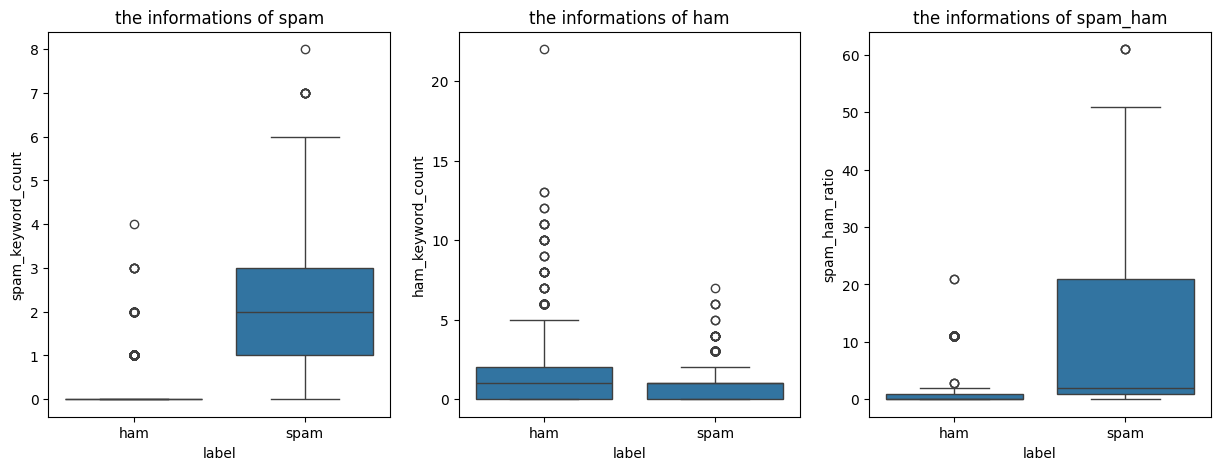

In [10]:
"""
ÂèØ‰ª•ËÄÉËôëÊèêÂèñ‰∏â‰∏™ÁâπÂæÅ
‰∏Ä‰∏™ÊòØËøô‰∏™Ê∂àÊÅØÁöÑÂ•ΩÂÖ≥ÈîÆËØç‰∏™Êï∞
‰∏Ä‰∏™ÊòØËøô‰∏™Ê∂àÊÅØÁöÑÂùèÂÖ≥ÈîÆËØç‰∏™Êï∞
ÂÜçÊù•ÁúãÁúãËøô‰∏™Ê∂àÊÅØÁöÑÂ•ΩÂùèÂÖ≥ÈîÆËØçÊØîÁéá
"""

spam_keywords_list = ['free', 'txt', 'text', 'mobil', 'stop', 'claim', 'repli', 'prize', 
                     'tone', 'nokia', 'servic', 'send', 'award']

ham_keywords_list = ['u', 'im', 'go', 'get', 'come', 'ltgt', 'ok', 'dont', 'got', 'know',
                    'like', 'ill', 'ur', 'love', 'good', 'time', 'day', 'want', 'need']

#ÁªüËÆ°ÂÖ≥ÈîÆËØç‰∏™Êï∞
def count_number(text,keyword_list):
    count = 0
    for word in text.split():
        if word in keyword_list:
            count += 1
    return count

#ÂùèÂÖ≥ÈîÆËØçÁªüËÆ°
train_df['spam_keyword_count'] = train_df['processed_message'].apply(
    lambda x:count_number(x,spam_keywords_list)
)
#Â•ΩÂÖ≥ÈîÆËØçÁªüËÆ°
train_df['ham_keyword_count'] = train_df['processed_message'].apply(
    lambda x:count_number(x,ham_keywords_list)
)

#ÂÖ≥ÈîÆËØçÊØî‰æã
train_df['spam_ham_ratio'] = (train_df['spam_keyword_count']+0.1)/(train_df['ham_keyword_count']+0.1)

plt.figure(figsize=(15, 5))
#Â¶ÇÊûúÊàëË¶ÅÁªòÂà∂‰∏âÂº†ÂõæÔºåÈÇ£‰πàÂøÖÈ°ªÊåáÂÆösubplot
plt.subplot(1,3,1)
sns.boxplot(data=train_df,x='label',y='spam_keyword_count')
plt.title('the informations of spam')

plt.subplot(1,3,2)
sns.boxplot(data=train_df,x='label',y='ham_keyword_count')
plt.title('the informations of ham')

plt.subplot(1,3,3)
sns.boxplot(data=train_df,x='label',y='spam_ham_ratio')
plt.title('the informations of spam_ham')



<Axes: xlabel='label', ylabel='ham_keyword_count'>

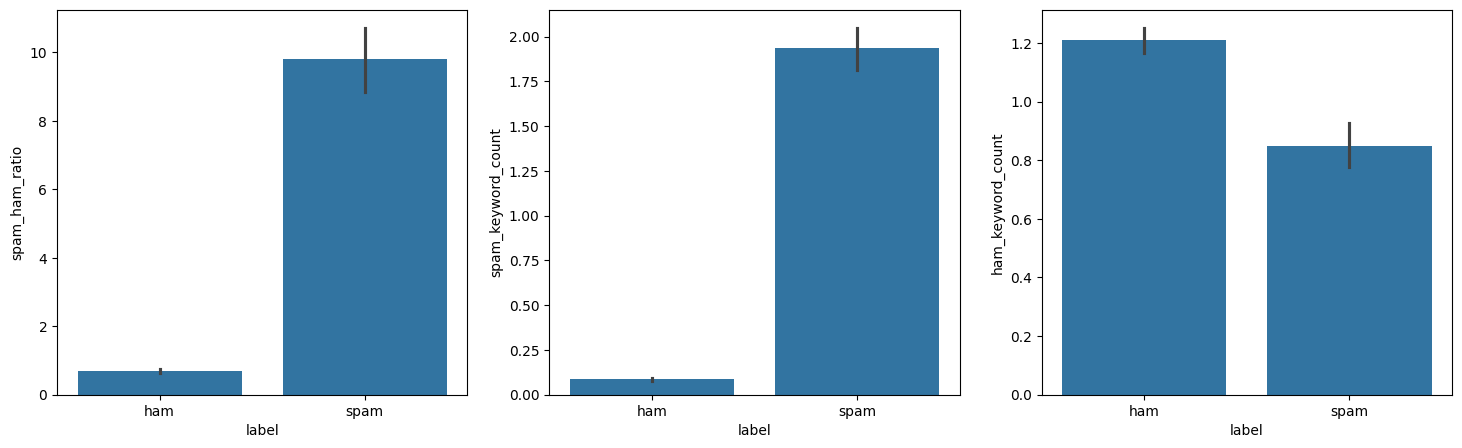

In [11]:
"""
ÁÆ±ÂûãÂõæË°®Áé∞ÂæàÊòéÊòæÔºåÊù•ÁúãÁúãbarplotÂõæÂêß
"""
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(data=train_df,x='label',y='spam_ham_ratio')

plt.subplot(1,3,2)
sns.barplot(data=train_df,x='label',y='spam_keyword_count')

plt.subplot(1,3,3)
sns.barplot(data=train_df,x='label',y='ham_keyword_count')

C:\Users\Ê±™ÂçöËâ∫\AppData\Local\Temp\ipykernel_28624\1719969027.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='label', y='message_length',


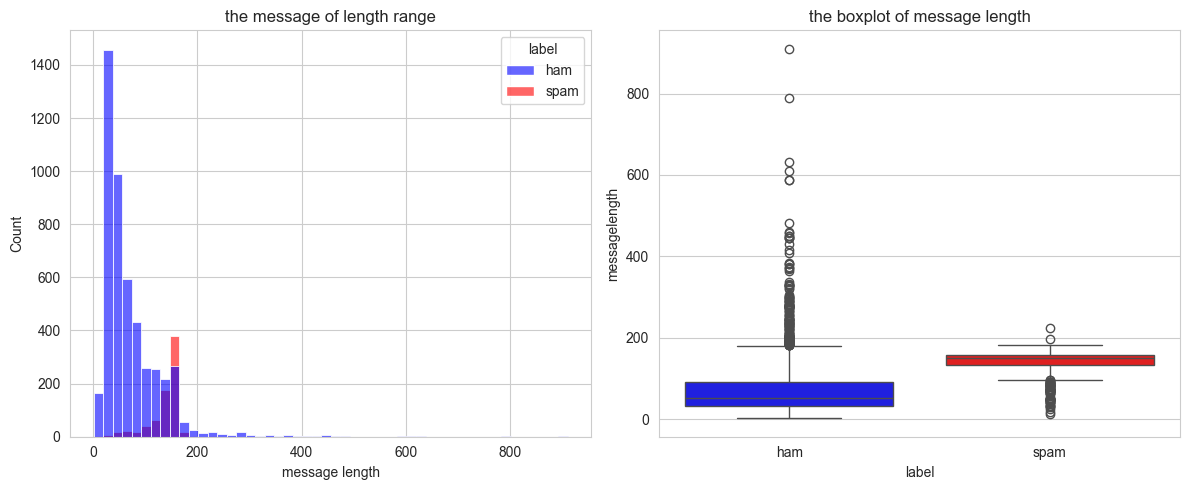

=== Ê∂àÊÅØÈïøÂ∫¶ÁªüËÆ° ===
Ê≠£Â∏∏Áü≠‰ø°ÈïøÂ∫¶ÁªüËÆ°:
count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: message_length, dtype: float64
ÂûÉÂúæÁü≠‰ø°ÈïøÂ∫¶ÁªüËÆ°:
count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: message_length, dtype: float64


In [12]:
"""
ÊñáÊú¨ËøôÁßçÈùûÁªìÊûÑÂåñÁöÑÁâπÂæÅ‰∏çÂêå‰∫é‰πãÂâçtitanicÈÇ£ÁßçÁªìÊûÑÂåñÁâπÂæÅ
ÊñáÊú¨ÊòØÈùûÁªìÊûÑÂåñÁâπÂæÅÔºåËøôÈúÄË¶ÅÊàë‰ª¨ÊèêÂèñÊñáÊú¨Êï∞ÊçÆ‰∏≠ÁöÑÁâπÂæÅÔºåÊääÊñáÂ≠óËΩ¨Âåñ‰∏∫ËÆ°ÁÆóÊú∫ËÉΩÁêÜËß£ÁöÑÊï∞Â≠óËØ≠Ë®Ä
ÈÇ£‰πàÂÖà‰ªéÊñáÊú¨ÁöÑÈïøÂ∫¶Êù•ÁúãÁúãÁâπÂæÅÂêß
ËØ∑Âá∫Êàë‰ª¨ÁöÑËÄÅÊúãÂèãhistplotÊù•ÁúãÁúã‰∏§‰∏™Ê∂àÊÅØÁöÑÂØπÊØîÊÉÖÂÜµ
"""
train_df['message_length'] = train_df['message'].apply(len)

# ËÆæÁΩÆÂõæÂΩ¢È£éÊ†º
sns.set_style("whitegrid")

# 1. Ê∂àÊÅØÈïøÂ∫¶ÂàÜÂ∏ÉÂõæ - ‰ΩøÁî®seaborn
plt.figure(figsize=(12, 5))

# ‰ΩøÁî®displotÊàñhistplotÊù•ÁªòÂà∂ÂàÜÂ∏É
plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='message_length', hue='label', bins=50, alpha=0.6, 
             palette={'ham': 'blue', 'spam': 'red'})
plt.title('the message of length range')
plt.xlabel('message length')

# 2. ÁÆ±Á∫øÂõæÊòæÁ§∫ÈïøÂ∫¶ÂàÜÂ∏É
plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='label', y='message_length', 
            palette={'ham': 'blue', 'spam': 'red'})
plt.title('the boxplot of message length')
plt.xlabel('label')
plt.ylabel('messagelength')

plt.tight_layout()
plt.show()

# 3. ÁªüËÆ°‰ø°ÊÅØ
print("=== Ê∂àÊÅØÈïøÂ∫¶ÁªüËÆ° ===")
print("Ê≠£Â∏∏Áü≠‰ø°ÈïøÂ∫¶ÁªüËÆ°:")
print(train_df[train_df['label']=='ham']['message_length'].describe())
print("ÂûÉÂúæÁü≠‰ø°ÈïøÂ∫¶ÁªüËÆ°:")
print(train_df[train_df['label']=='spam']['message_length'].describe())



Text(0, 0.5, 'ratio')

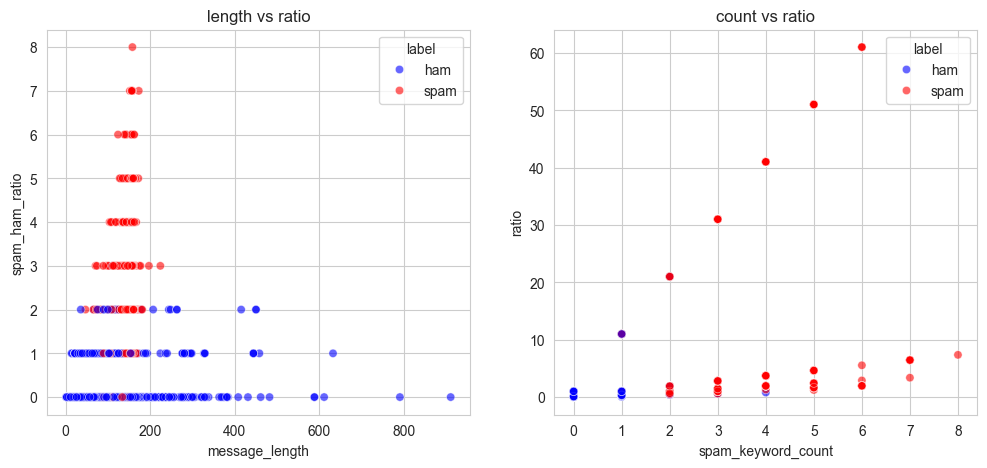

In [13]:
"""
‰ªéÊúÄÂºÄÂßãÊàëÁ°ÆÂÆûÁúãÂá∫ÈïøÂ∫¶ÂØπÂûÉÂúæÁü≠‰ø°ÂíåÊ≠£Â∏∏Áü≠‰ø°ÊúâÁùÄÂæàÊòéÊòæÁöÑ‰∏Ä‰∏™Âå∫ÂàÜÂ∫¶„ÄÇ
Êó†ËÆ∫‰ªéhistplotÊàñËÄÖboxplotÈÉΩÂèØ‰ª•ÁúãÂá∫Ê≠£Â∏∏Áü≠‰ø°ÂíåÂûÉÂúæÁü≠‰ø°ÁöÑÂå∫ÂàÜÂ∫¶
‰ΩÜÊòØÊàëÊ≥®ÊÑèÂà∞‰πüÊúâÂæàÂ§öÊ≠£Â∏∏Áü≠‰ø°ÊòØÂú®138‚Äî‚Äî157‰πãÈó¥ÁöÑÔºåÊâÄ‰ª•ÊàëÊúÄÂºÄÂßãÁöÑÊÉ≥Ê≥ïÊòØ‚Äî‚Äî‚Äî‚ÄîÂ¶ÇÊûú‰ª•ÈïøÂ∫¶Êù•ËØÑÂà§ÔºåÊòØÂèØ‰ª•Âå∫
ÂàÜÂæàÂ§öÂûÉÂúæÁü≠ÊÅØÔºå‰ΩÜ‰πü‰ºöËØØÂà§ÂæàÂ§öÊ≠£Â∏∏Áü≠‰ø°Ôºàboxplot‰∏≠ÁöÑÂºÇÂ∏∏ÂÄº‰πüËÆ©ÊàëËØØÂà§‰∫ÜËøô‰∏ÄÈîôËØØËßÇÁÇπÔºâ
‰ΩÜ‰∫ãÂÆûÊòØÔºö
1. ÈïøÂ∫¶‰∏çÊòØËØÑÂà§ÁöÑÂîØ‰∏ÄÊ†áÂáÜÔºåÂÆÉÂè™ÊòØÂÖ∂‰∏≠‰∏Ä‰∏™ËæÖÂä©ÁâπÂæÅÁöÑÊ†áÂáÜ
2. Ê®°ÂûãÊ≤°ÈÇ£‰πàÁ¨®ÔºåÂÆÉËá™Â∑±‰ºöËßÑÈÅøËøô‰∫õÁ¶ªË∞±ÁöÑÂÅèÂÄº
Âõ†Ê≠§Ê∂àÊÅØÈïøÂ∫¶ÊòØËßÇÂØüÂá∫Êù•ÁöÑÂæàÂ•ΩÁöÑ‰∏Ä‰∏™ÁâπÂæÅ„ÄÇ
ÊàëÊÉ≥Ëµ∑irisÁöÑÈ°πÁõÆÔºåÊàëËøõË°å‰∫Ü‰∏Ä‰∏™ÁåúÊÉ≥‚Äî‚Äî‚Äî‚ÄîÂûÉÂúæÁü≠‰ø°ÊúâÊõ¥ÊòéÊòæÁöÑÈïøÂ∫¶ÔºåÊõ¥Â§öÁöÑÂûÉÂúæÂÖ≥ÈîÆËØçÔºåÊõ¥È´òÁöÑÂûÉÂúæÔºöÊ≠£Â∏∏ËØçÁöÑÊØî‰æã
"""
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=train_df,x='message_length',y='spam_keyword_count',hue='label',
                alpha=0.6,palette={'ham':'blue','spam':'red'}
               )
plt.title('length vs ratio')
plt.xlabel('message_length')
plt.ylabel('spam_ham_ratio')

plt.subplot(1,2,2)
sns.scatterplot(data=train_df,x='spam_keyword_count',y='spam_ham_ratio',hue='label',
                alpha=0.6,palette={'ham':'blue','spam':'red'}
               )
plt.title('count vs ratio')
plt.xlabel('spam_keyword_count')
plt.ylabel('ratio')

In [14]:
"""
ËøòÊòØÊàë‰πãÂâçËØ¥ÁöÑÔºåÈïøÂ∫¶Ëøô‰∏™ÁâπÂæÅÊàñËÆ∏‰∏çÊòØ‰∏Ä‰∏™ÁâπÂà´Â•ΩÁöÑÁâπÂæÅÔºå‰ΩÜÂÆÉÂíåÂÖ∂ÂÆÉÁâπÂæÅÁªÑÂêàÂú®‰∏ÄËµ∑ÂæàÂèØËÉΩ‰ºöÊõ¥Â•ΩÁöÑÈ¢ÑÊµãÂá∫Êàë‰ª¨ÊÉ≥Ë¶ÅÁöÑÊï∞ÊçÆÔºÅ
Áé∞Âú®ÂºÄÂßãÊ®°ÂûãËÆ≠ÁªÉ
"""
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = train_df[['message_length','spam_keyword_count','spam_ham_ratio']]
y = train_df['label']#È∫ªÁÉ¶ËÆ∞‰ΩèÁé∞Âú®ÊàëËÆ©y=train_df['label']‰∫ÜÔºÅÂêéÈù¢ÁöÑÊâÄÊúâyÈÉΩÊòØtrain_df['label']

#Ê†áÂáÜÂåñÊï∞ÊçÆ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(
    X_scaled,y,test_size=0.2,random_state=42,stratify=y
)

# ÂàùÂßãÂåñÂ§ö‰∏™Ê®°Âûã
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# ‰∫§ÂèâÈ™åËØÅËØÑ‰º∞
print("\n=== ‰∫§ÂèâÈ™åËØÅÁªìÊûú (5Êäò) ===")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    print(f"{name}: {cv_scores.mean():.4f} (¬±{cv_scores.std():.4f})")

# ËÆ≠ÁªÉÂπ∂Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞ÊúÄ‰Ω≥Ê®°Âûã
print("\n=== ÊµãËØïÈõÜÊÄßËÉΩ ===")
best_model = None
best_accuracy = 0

#Ê®°ÂûãËÆ≠ÁªÉ
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"\n{name} ÂáÜÁ°ÆÁéá: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# ËØ¶ÁªÜÂàÜÊûêÊúÄ‰Ω≥Ê®°Âûã
print(f"\nüéØ ÊúÄ‰Ω≥Ê®°Âûã: {type(best_model).__name__}")
print(f"ÊµãËØïÈõÜÂáÜÁ°ÆÁéá: {best_accuracy:.4f}")


=== ‰∫§ÂèâÈ™åËØÅÁªìÊûú (5Êäò) ===
Logistic Regression: 0.9354 (¬±0.0039)
SVM (Linear): 0.9388 (¬±0.0044)
SVM (RBF): 0.9458 (¬±0.0021)
Random Forest: 0.9442 (¬±0.0032)

=== ÊµãËØïÈõÜÊÄßËÉΩ ===

Logistic Regression ÂáÜÁ°ÆÁéá: 0.9390

SVM (Linear) ÂáÜÁ°ÆÁéá: 0.9480

SVM (RBF) ÂáÜÁ°ÆÁéá: 0.9525

Random Forest ÂáÜÁ°ÆÁéá: 0.9561

üéØ ÊúÄ‰Ω≥Ê®°Âûã: RandomForestClassifier
ÊµãËØïÈõÜÂáÜÁ°ÆÁéá: 0.9561


In [15]:
"""
‰ª•‰∏äÊòØNLPÁöÑÂü∫Êú¨Â§ÑÁêÜÊÉÖÂÜµ
ÂÆûÈôÖ‰∏äÔºåNLP‰∏çÂçïÂçïÊòØÊúâÂçïÁ∫ØÁöÑÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÔºàÊØîÂ¶Ç‰πãÂâçÊèêÂà∞ÁöÑÂàÜËØçÔºåÂÅúÁî®ËØçÔºåÊäìËØçÊ†πÔºâ
ËøòÊúâÂæàÈáçË¶ÅÁöÑ‰∏§ÈÉ®ÂàÜÊòØÊàë‰ª¨Ê≤°ÊúâÁî®ÁöÑÔºö
1. TF-IDF
2. n-gram

ÂÖàÊù•ËØ¥TF-IDFÔºåÂÉèÊàë‰ª¨‰πãÂâçÂºÑÁöÑÂÖ≥ÈîÆËØç‰∏™Êï∞ÔºåÂØπ‰∫éTF-IDFÊù•ËØ¥ÔºåÂÆÉ‰∏ç‰ªÖ‰ªÖÊòØËÆ∞ÂΩïËØçÈ¢ëÔºåËøòË¶Å‰∏∫ÊØè‰∏™ËØçÂàÜÈÖçÂÖ∂ÊùÉÈáç
‰πüÂ∞±ÊòØÊõ¥Âä†‰øùËØÅ‰∫Ü‰∏Ä‰∫õÊ≠£Â∏∏Áü≠‰ø°‰∏ç‰ºöË¢´ËØØÂà§ÔºåÊØîÂ¶Ç‰πãÂâçÂú®ÂûÉÂúæÁü≠‰ø°ÂÖ≥ÈîÆËØçÈáåÔºåÊùÉÈáçÊúÄÈ´òÁöÑÂá†‰∏™ËØç
free win prize
 ‰ΩÜÂ¶ÇÊûúÊ≠£Â∏∏Áü≠‰ø°‰∏≠‰πüÁªèÂ∏∏ËØ¥Ôºö"I'm free to meet"Ôºå"win a game"Ôºå"prize winner"
 ÊàëÁöÑÊñπÊ≥ï‰ºöÁªôËøô‰∫õËØçÈ´òÊùÉÈáçÔºå‰ΩÜÂÆûÈôÖ‰∏äÂÆÉ‰ª¨Ê≤°ÊúâÂå∫ÂàÜÂ∫¶
 TF-IDF‰ºöËá™Âä®ÂèëÁé∞Ôºö
 - "free" Âú®ÂæàÂ§öÊñáÊ°£‰∏≠ÈÉΩÂá∫Áé∞ ‚Üí ÊùÉÈáçÈôç‰Ωé  
 - "claim" ‰∏ªË¶ÅÂú®ÂûÉÂúæÁü≠‰ø°‰∏≠Âá∫Áé∞ ‚Üí ÊùÉÈáçÊèêÈ´ò
 - "urgent" ‰∏ªË¶ÅÂú®ÂûÉÂúæÁü≠‰ø°‰∏≠Âá∫Áé∞ ‚Üí ÊùÉÈáçÊèêÈ´ò
"""

#1.ÂàõÂª∫TF-IDFÂêëÈáè
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features = 1000,
    stop_words = 'english',#Ëá™Âä®ÁßªÈô§Ëã±ÊñáÂÅúÁî®ËØç
    ngram_range=(1,1) #ÈªòËÆ§ÁöÑ1-gram
)

#2. Â∫îÁî®TF-IDFÂà∞ÊñáÊú¨Êï∞ÊçÆ
X_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_message'])

# 3. Êü•ÁúãÁâπÂæÅÁü©ÈòµÁöÑÂΩ¢Áä∂
print(f"TF-IDFÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: {X_tfidf.shape}")
print(f"Ê†∑Êú¨Êï∞: {X_tfidf.shape[0]}")
print(f"ÁâπÂæÅÊï∞(ËØçÊ±áË°®Â§ßÂ∞è): {X_tfidf.shape[1]}")

# 4. Êü•Áúã‰∏Ä‰∫õÈáçË¶ÅÁöÑÁâπÂæÅÔºàËØçÔºâ
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\n=== ÊúÄÈáçË¶ÅÁöÑ20‰∏™TF-IDFÁâπÂæÅ ===")
for i, feature in enumerate(feature_names[:20]):
    print(f"{i+1}. {feature}")

# 5. Êü•ÁúãTF-IDFÊùÉÈáçÁ§∫‰æã
print("\n=== TF-IDFÊùÉÈáçÁ§∫‰æã ===")
sample_idx = 0  # ÁúãÁ¨¨‰∏Ä‰∏™Ê†∑Êú¨
sample_vector = X_tfidf[sample_idx].toarray().flatten()

# ÊâæÂà∞ÊùÉÈáçÊúÄÈ´òÁöÑËØç
top_indices = sample_vector.argsort()[-5:][::-1]
print(f"Ê†∑Êú¨ÂÜÖÂÆπ: {train_df['message'].iloc[sample_idx][:50]}...")
for idx in top_indices:
    if sample_vector[idx] > 0:  # Âè™ÊòæÁ§∫ÊúâÊùÉÈáçÁöÑÁâπÂæÅ
        print(f"  '{feature_names[idx]}': {sample_vector[idx]:.4f}")

TF-IDFÁâπÂæÅÁü©ÈòµÂΩ¢Áä∂: (5572, 1000)
Ê†∑Êú¨Êï∞: 5572
ÁâπÂæÅÊï∞(ËØçÊ±áË°®Â§ßÂ∞è): 1000

=== ÊúÄÈáçË¶ÅÁöÑ20‰∏™TF-IDFÁâπÂæÅ ===
1. abiola
2. abl
3. abt
4. accept
5. access
6. account
7. activ
8. actual
9. ad
10. add
11. address
12. admir
13. aft
14. afternoon
15. age
16. ago
17. ah
18. aha
19. ahead
20. aight

=== TF-IDFÊùÉÈáçÁ§∫‰æã ===
Ê†∑Êú¨ÂÜÖÂÆπ: Go until jurong point, crazy.. Available only in b...
  'la': 0.4314
  'crazi': 0.4075
  'avail': 0.4001
  'point': 0.3593
  'world': 0.3576


In [16]:
"""
ËøôÈáå‰ºöÊúâÁñëÊÉëÔºå‰∏∫Âï•‰πãÂâçË¶ÅÊâãÂä®ÂÜôÂáΩÊï∞Êù•ÁªüËÆ°ÂÖ≥ÈîÆËØçËÄåËøôÈáåÂè™Áî®Â£∞ÊòéTF-IDFÂêéÂ∞±Áõ¥Êé•Áî®Â∫ìÂáΩÊï∞Â∞±ÁªüËÆ°Âá∫Â∏¶ÊùÉÂÄºÁöÑËØçÈ¢ëÁªìÊûú‰∫Ü
ËøôÊ≠£ÊòØTF-IDFÂ∫ìÁöÑÂº∫Â§ßÔºåÂè™Áî®ÂØπtrain_XËøõË°åfit_transformÂç≥ÂèØ,ËÄå‰∏çÁî®‰∏Ä‰∏™‰∏™ÂÜçÊù•ÊâãÂä®ÁªüËÆ°ÂÖ≥ÈîÆËØçÔºåËøòË¶ÅËÆ°ÁÆó‰ªÄ‰πàspam_ham_ratio
ËÄå‰∏îÁªôÂá∫ÁöÑÁªìÊûúËøòÊõ¥Â•ΩÁöÑËÆ©Êàë‰ª¨ËøõË°åÈ¢ÑÊµãÔºå‰ª£Á†ÅÂ¶Ç‰∏ã
"""

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, train_df['label'], test_size=0.2, random_state=42, stratify=y
)

best_accuracy = 0
#Ê®°ÂûãËÆ≠ÁªÉÔºàÂä°ÂøÖËÆ∞‰Ωè‰ª£Á†ÅÊµÅÁ®ãÔºâ
for name,model in models.items():
    model.fit(X_train_tfidf,y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"{name}: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy

# ‰∏é‰πãÂâçÁöÑÊâãÂ∑•ÁâπÂæÅÂØπÊØî
print(f"\n=== ÂØπÊØî‰πãÂâçÁöÑÊâãÂ∑•ÁâπÂæÅ ===")
print(f"ÊâãÂ∑•ÁâπÂæÅÂáÜÁ°ÆÁéá: 0.9561")
print(f"TF-IDFÁâπÂæÅÂáÜÁ°ÆÁéá: {best_accuracy:.4f}")
    

Logistic Regression: 0.9668
SVM (Linear): 0.9812
SVM (RBF): 0.9812
Random Forest: 0.9767

=== ÂØπÊØî‰πãÂâçÁöÑÊâãÂ∑•ÁâπÂæÅ ===
ÊâãÂ∑•ÁâπÂæÅÂáÜÁ°ÆÁéá: 0.9561
TF-IDFÁâπÂæÅÂáÜÁ°ÆÁéá: 0.9812


In [17]:
"""
TF-IDFÂπøÊ≥õÁî®‰∫éNLPÈáåÈù¢ÔºåËÆ°ÁÆóÂá∫ÊØè‰∏™ÂçïËØçÁöÑÊùÉÂÄºÔºåÂæóÂá∫‰∏Ä‰∏™ÈîÆÂÄºÂØπÊï∞ÊçÆ
ÊØîÂ¶ÇÂú®ËØ•È°πÁõÆÈáåÔºåÂæóÂá∫ÁöÑ1000‰∏™ÈîÆÂÄºÂØπ‰ø°ÊÅØÔºåÊàë‰ª¨ÂÆåÂÖ®ÊääÂÆÉÊäΩË±°Âá∫‰∫Ü1000‰∏™ÁâπÂæÅ„ÄÇ
Êàë‰ª¨Áî®Ëøô1000‰∏™ÁâπÂæÅÂÆåÂÆåÂÖ®ÂÖ®ÁöÑÂéªËÆ≠ÁªÉÊï∞ÊçÆÔºåÂÖ∂ÂáÜÁ°ÆÂ∫¶ÂÆåÂÖ®Ë∂ÖËøá‰∫ÜÊàë‰ª¨ËæõËã¶ÁöÑEDAÂ∑•Á®ãÈáåÂàõÂª∫ÁöÑ3‰∏™ÁâπÂæÅÁÑ∂ÂêéÁî®Ëøô3‰∏™ÁâπÂæÅËÆ≠ÁªÉÊï∞ÊçÆÁöÑÂáÜÁ°ÆÂ∫¶
‰ΩÜËøô‰∏ç‰ª£Ë°®‰ª•ÂêéÊàë‰ª¨Â∞±Ë¶ÅÊîæÂºÉEDAÂ∑•Á®ãÔºå‰πüËÆ∏Â∞ÜÂÖ∂‰∫åËÄÖÁªìÂêà‰ºöÊõ¥Â•ΩÔºå‰∏çËøáËøòÊòØÈÇ£Âè•ËØùÔºåËøò‰∏çÂ•Ω‰∏çÊòØ‰∏ÄÊãçËÑëË¢ãÂÜ≥ÂÆöÁöÑÔºåËÄåÊòØÈù†Êï∞ÊçÆÂíåÂÆûÈ™åËØ¥ËØùÁöÑÔºÅ
‰∫åËÄÖÁªìÂêàÁöÑÊñπÂºèÂæàÁÆÄÂçïÔºåÂ∞ÜÊàë‰ª¨ÂæóÂà∞ÁöÑEDAÂ∑•Á®ãÁöÑDataFrameÊï∞ÊçÆÂè™ÂèñvaluesÔºåÁÑ∂ÂêéÂèòÊàêÁ®ÄÁñèÁü©ÈòµÔºàÂõ†‰∏∫TF-IDFÂæóÂà∞ÁöÑÊòØ‰∏Ä‰∏™Á®ÄÁñèÁü©ÈòµÔºâ
ÁÑ∂ÂêéÂÜçÂÄüÂä©Â∫ìÂáΩÊï∞hstackÂêàÂπ∂Âç≥ÂèØ
"""

from scipy.sparse import hstack, csr_matrix

# ÂàõÂª∫ÊâãÂ∑•ÁâπÂæÅÁü©Èòµ
X_manual = train_df[['message_length', 'spam_keyword_count', 'spam_ham_ratio']]

# ËΩ¨Êç¢‰∏∫Á®ÄÁñèÁü©ÈòµÂπ∂ÂêàÂπ∂
X_manual_sparse = csr_matrix(X_manual.values)
X_combined = hstack([X_manual_sparse, X_tfidf])

print(f"ÂêàÂπ∂ÂêéÁöÑÁâπÂæÅÂΩ¢Áä∂: {X_combined.shape}")

# ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ
X_train_mix, X_test_mix, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)

# Êõ¥Êñ∞Ê®°ÂûãÈÖçÁΩÆÔºåÂ¢ûÂä†Ëø≠‰ª£Ê¨°Êï∞
models_updated = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# ËÆ≠ÁªÉÂíåËØÑ‰º∞
print("\n=== Ê∑∑ÂêàÁâπÂæÅÊÄßËÉΩ ===")
best_accuracy = 0
best_model_name = ""

for name, model in models_updated.items():
    model.fit(X_train_mix, y_train)
    y_pred = model.predict(X_test_mix)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name}: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f"\nüéØ ÊúÄ‰Ω≥Ê®°Âûã: {best_model_name}")
print(f"ÊúÄ‰Ω≥ÂáÜÁ°ÆÁéá: {best_accuracy:.4f}")

# ÂØπÊØîÁªìÊûú
print("\n=== ÊÄßËÉΩÂØπÊØî ===")
print(f"Âè™ÊúâÊâãÂ∑•ÁâπÂæÅ: 0.9561")
print(f"Âè™ÊúâTF-IDFÁâπÂæÅ: 0.9812") 
print(f"Ê∑∑ÂêàÁâπÂæÅ: {best_accuracy:.4f}")


ÂêàÂπ∂ÂêéÁöÑÁâπÂæÅÂΩ¢Áä∂: (5572, 1003)

=== Ê∑∑ÂêàÁâπÂæÅÊÄßËÉΩ ===
Logistic Regression: 0.9632
SVM (Linear): 0.9785
SVM (RBF): 0.9139
Random Forest: 0.9758

üéØ ÊúÄ‰Ω≥Ê®°Âûã: SVM (Linear)
ÊúÄ‰Ω≥ÂáÜÁ°ÆÁéá: 0.9785

=== ÊÄßËÉΩÂØπÊØî ===
Âè™ÊúâÊâãÂ∑•ÁâπÂæÅ: 0.9561
Âè™ÊúâTF-IDFÁâπÂæÅ: 0.9812
Ê∑∑ÂêàÁâπÂæÅ: 0.9785


In [18]:
"""
Êé•‰∏ãÊù•ÁúãÁúãNLPÁöÑÂè¶‰∏Ä‰∏™ÈáçË¶ÅÁöÑ‰∏úË•øN-gram
N-gramÂ∞±ÊòØËøûÁª≠ÁöÑN‰∏™ÁªÑÂêà
ÊØîÂ¶ÇÂ¶ÇÊûúÊåâÁÖß‰πãÂâçÊàë‰ª¨ÂÖ≥ÈîÆËØçÁöÑÂª∫Á´ãÊù•ËØ¥ÔºåÈÇ£‰∏™ÊòØ‰∏Ä‰∏™1-gramÔºå["free", "iphone", "prize"] 
‰ΩÜÊòØ1-gramÊúâ‰∏Ä‰∏™ÈóÆÈ¢òÔºåÂÆÉÊó†Ê≥ïÊçïÊçâËØçÂ∫èÂíåÁü≠ËØ≠Âê´‰πâÔºåÂõ†Ê≠§ÂÆÉÁöÑ‰∏ä‰∏ãÊñáË°îÊé•‰∏çÊòØÁâπÂà´Â•ΩÔºåÊØîÂ¶ÇÔºö
"free gift" ‚Üí ÂèØËÉΩÊòØÂûÉÂúæÁü≠‰ø°
"gift free" ‚Üí ‰∏çËá™ÁÑ∂ÁöÑË°®ËææÔºåÂèØËÉΩ‰∏çÊòØÂûÉÂúæÁü≠‰ø°
Âõ†Ê≠§ÂèØ‰ª•ÂÄüÂä©2-gramÊàñËÄÖ3-gram.......N-gramÊù•ËøõË°åÂàÜÊûê
ÊØîÂ¶Ç‰∏Ä‰∏™2-gramÁöÑÊ†∑Â≠êÊòØËøôÊ†∑ÁöÑÔºöÂûÉÂúæÁü≠‰ø°Â∏∏ËßÅ["free offer", "claim now", "prize winner", "text stop", "mobile number"]

Ëøô‰∏™È°πÁõÆÂè™ÊòØ‰∏Ä‰∏™Â∞èÈ°πÁõÆÔºå‰∏á‰∏Ä‰ª•ÂêéÈÅáÂà∞Êõ¥Â§ßÁöÑÈ°πÁõÆÔºåÈúÄË¶ÅÊõ¥Â•ΩÁöÑÂàÜÊûê‰∏ä‰∏ãÊñáÊó∂ÔºåËøêÁî®N-gramÂçÅÂàÜÈáçË¶ÅÁöÑ
"""

#ËÆæÁ´ã‰∏Ä‰∏™n-gramËåÉÂõ¥
ngram_configs = [
    (1, 1),  # Âè™‰ΩøÁî®Âçï‰∏™ËØçÔºà‰º†ÁªüËØçË¢ãÔºâ
    (1, 2),  # ‰ΩøÁî®Âçï‰∏™ËØçÊàñÂèåËØçÁªÑÂêà ‚Üê ÊúÄÂ∏∏Áî®
    (2, 2),  # Âè™‰ΩøÁî®ÂèåËØçÁªÑÂêà
    (1, 3),  # ‰ΩøÁî®1-3‰∏™ËØçÁöÑÁªÑÂêà
]

#‰ΩøÁî®ÈöèÊú∫Ê£ÆÊûóÊù•ËØÑ‰º∞
randF = RandomForestClassifier(n_estimators=100, random_state=42)

bestaccuracy = 0
bestngram = (1,1)
for ngramRange in ngram_configs:
    vectorizer = TfidfVectorizer(ngram_range=ngramRange, max_features = 1000,stop_words = 'english')#ËøòÊòØ‰πãÂâçÁöÑTF-IDFÂÆπÂô®ÔºåÂè™ÊòØËøôÈáåÊàëÊåáÂÆö‰∫ÜÁî®Â§öÂ∞ën-gram
    X_ngram = vectorizer.fit_transform(train_df['processed_message'])
    X_ngram_train,X_ngram_test,y_train,y_test = train_test_split(
        X_ngram, y, test_size=0.2, random_state=42, stratify=y
    )
    randF.fit(X_ngram_train,y_train)
    y_pred = randF.predict(X_ngram_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"ËØçÁªÑ{ngramRange}: {accuracy:.4f}")
    if accuracy > bestaccuracy:
        bestaccuracy = accuracy
        bestngram = ngramRange

print(f'ÁªèËøán-gramÂºïÂÖ•ÂêéÁöÑÂáÜÁ°ÆÁéá:{bestaccuracy:.4f}')
print('ÊúÄÂ•ΩÁöÑÊÉÖÂÜµÔºö',bestngram)


ËØçÁªÑ(1, 1): 0.9767
ËØçÁªÑ(1, 2): 0.9740
ËØçÁªÑ(2, 2): 0.9570
ËØçÁªÑ(1, 3): 0.9749
ÁªèËøán-gramÂºïÂÖ•ÂêéÁöÑÂáÜÁ°ÆÁéá:0.9767
ÊúÄÂ•ΩÁöÑÊÉÖÂÜµÔºö (1, 1)


In [19]:
"""
Ëøô‰∏™È°πÁõÆÈáåÔºåÁî±‰∫éÊï∞ÊçÆÊØîËæÉÂ∞ëÔºåËÄå‰∏îÂàÜÊûêÁöÑÁü≠‰ø°ÈÉΩÊòØÊØîËæÉÁü≠ÁöÑÔºåÊâÄ‰ª•Êù•ËØ¥1-gramÊúÄÂ•Ω„ÄÇ
‰ΩÜÂà∞‰∫ÜÂêéÊúüÁöÑÂ§ßÈ°πÁõÆÔºåÊØîÂ¶ÇLLMÊàñËÄÖ‰∏çËØ¥ÈÇ£‰πàËøúÔºå‰ª•ÂêéÊØîÂ¶ÇÂàÜÊûêÊñáÁ´†ÊàñËÄÖÁîµÂΩ±ËØÑËÆ∫Êù•Âà§ÂÆöÊÉÖÊÑüËøô‰∫õÈ°πÁõÆÊó∂ÔºåÊàñËÆ∏Â§ö‰∏™ËØçÁöÑÂàÜÊûê‰ºöÊõ¥Â•Ω
ÈÇ£‰πàÁé∞Âú®ÂºÄÂßãËøõË°åË∞ÉÂèÇÔºåÊù•Ë∞ÉÈöèÊú∫Ê£ÆÊûóÂíåsvcÁöÑÂèÇÊï∞
"""

"""
ÈöèÊú∫Ê£ÆÊûóË∞ÉÊï¥Ê†ëÈ´òÂíåÊ†ëÁöÑÊï∞Èáè
SVMÂàôË∞ÉÊï¥CÂÄºÔºåÊ†∏ÂáΩÊï∞
Ë∞ÉÂèÇÂàÜÊûêÈáåÔºåÊàë‰ª¨Áî®‰πãÂâçtitanicÈáåÁî®ÁöÑËÄÅÊúãÂèãÁΩëÁä∂‰∫§ÂèâÈ™åËØÅÊù•ÊâæÂèÇÊï∞
"""
from sklearn.model_selection import GridSearchCV

vectorizer = TfidfVectorizer(
    ngram_range = (1,1),
    max_features = 1000,
    stop_words = 'english'
)

#Êàë‰ª¨Êõ¥Êñ∞‰∏Ä‰∏ã‰πãÂâçÂÆö‰πâÁöÑX‰ª•ÂèäÂÜç‰∏ÄÊ¨°ÊèêÈÜí‰∏Ä‰∏ãyÊòØdf['label']
X = vectorizer.fit_transform(train_df['processed_message'])

# random_stateÁ°Æ‰øùËøô‰∫õÈöèÊú∫Êìç‰ΩúÂèØÈáçÁé∞,Èöè‰æøÂÆö‰∏Ä‰∏™Êï∞Â≠ó„ÄÇ
# stratify=yÁ°Æ‰øùËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ‰∏≠ÁöÑÁ±ªÂà´ÊØî‰æãÁõ∏Âêå,‰øùËØÅÂàÜÂâ≤ÂêéÔºöËÆ≠ÁªÉÈõÜ 80% Ê≠£Â∏∏Ôºå20% ÂûÉÂúæÔºõÊµãËØïÈõÜ 80% Ê≠£Â∏∏Ôºå20% ÂûÉÂúæ
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2, random_state = 42, stratify=y
)


In [22]:
"""
ÂÖàÊù•Ë∞ÉÊï¥ÈöèÊú∫Ê£ÆÊûóÁöÑÂèÇÊï∞
"""

# 1. ÂÖàË∞ÉÈöèÊú∫Ê£ÆÊûóÔºà‰ΩøÁî®ËæÉÂ∞èÁöÑÂèÇÊï∞ÁΩëÊ†ºÔºâ

rf_param_grid_simple = {
    'n_estimators': [50,100, 200],      # Ê†ëÁöÑÊï∞Èáè
    'max_depth': [None, 10,20],         # ÊúÄÂ§ßÊ∑±Â∫¶
    'min_samples_split': [2, 5]      # ÂàÜË£ÇÊâÄÈúÄÊúÄÂ∞èÊ†∑Êú¨Êï∞
}

print("ÂºÄÂßãÈöèÊú∫Ê£ÆÊûóÂèÇÊï∞Ë∞É‰ºòÔºàÁÆÄÂåñÁâàÔºâ...")
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),# random_stateÁ°Æ‰øùËøô‰∫õÈöèÊú∫Êìç‰ΩúÂèØÈáçÁé∞,Èöè‰æøÂÆö‰∏Ä‰∏™Êï∞Â≠ó
    rf_param_grid_simple,
    cv=3,
    scoring='accuracy'
)

rf_grid.fit(X_train, y_train)
print("ÈöèÊú∫Ê£ÆÊûóÊúÄ‰Ω≥ÂèÇÊï∞:", rf_grid.best_params_)
print("ÈöèÊú∫Ê£ÆÊûóÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂàÜÊï∞:", rf_grid.best_score_)

ÂºÄÂßãÈöèÊú∫Ê£ÆÊûóÂèÇÊï∞Ë∞É‰ºòÔºàÁÆÄÂåñÁâàÔºâ...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
ÈöèÊú∫Ê£ÆÊûóÊúÄ‰Ω≥ÂèÇÊï∞: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
ÈöèÊú∫Ê£ÆÊûóÊúÄ‰Ω≥‰∫§ÂèâÈ™åËØÅÂàÜÊï∞: 0.9728506842010655


In [ ]:
"""
Â•ΩÂêßÔºåË∞ÉÂèÇÂêéÂàÜÊï∞Êõ¥‰Ωé‰∫Ü
ÂèØËÉΩÊúÄ‰ºòÂèÇÊï∞‰∏çÂú®Êàë‰ª¨ËÆæÁΩÆÁöÑÁΩëÊ†ºËåÉÂõ¥ÂÜÖÔºåÊàñËÄÖÁΩëÊ†ºÂ§™Á®ÄÁñèÔºåÈîôËøá‰∫ÜÊúÄ‰Ω≥ÂèÇÊï∞„ÄÇ
‰∏çËøáÂè™Ë¶ÅÁü•ÈÅìË∞ÉÂèÇÊòØ‰∏∫‰∫ÜÊâæÊõ¥Â•ΩÁöÑÈ¢ÑÊµãÊÉÖÂÜµ‰ª•Âèä‰∫ÜËß£ÂΩ±ÂìçÂèÇÊï∞Â∞±Ë°åÔºåÂÖ∂ÂÆÉÁöÑÊàë‰πü‰∏çÂÉèÂÜçÂéªÊâæÂèÇÊï∞‰∫Ü„ÄÇ
Ëá≥Ê≠§ÔºåspamÈ°πÁõÆÂÆåÁªì.
"""